In [ ]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as pyplot
%matplotlib inline

In [ ]:
! sudo apt install openjdk-8-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 17 not upgraded.
Need to get 43.5 MB of archives.
After this 

In [ ]:
! sudo update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [ ]:
! pip install language-check

  Created wheel for language-check: filename=language_check-1.1-cp36-none-any.whl size=90190900 sha256=96fb5ccf864037237461566c8a648f3705e71065bacb45f698830ba07aee22b2
  Stored in directory: /root/.cache/pip/wheels/d5/46/82/90a89c23eac1837364ed7217a9eed71bc9e6ad4825be93968e
Successfully built language-check


In [ ]:
import language_check

In [ ]:
#Importing Data
data = pd.read_excel('/training_set_rel3.xls')
data.head()
#data.shape (12978,28)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12978.000000,12978.000000,12977.000000,12977.000000,128.000000,12977.000000,1800.000000,1800.000000,1800.000000,2292.000000,2292.000000,2292.000000,2292.000000,723.000000,723.000000,2292.000000,2292.000000,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.432809,4.179458,4.126840,4.137089,37.828125,6.799723,3.333889,3.330556,3.333889,2.444154,2.557592,2.606457,2.705061,3.731674,3.564315,2.472513,2.577225,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6308.588616,2.136749,4.212537,4.264320,5.240829,8.970558,0.729103,0.726807,0.729103,1.211730,1.061076,1.098196,1.035937,0.717746,0.699980,1.246780,1.085464,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4439.250000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10045.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15680.750000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [ ]:
data.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        1
rater2_domain1        1
rater3_domain1    12850
domain1_score         1
rater1_domain2    11178
rater2_domain2    11178
domain2_score     11178
rater1_trait1     10686
rater1_trait2     10686
rater1_trait3     10686
rater1_trait4     10686
rater1_trait5     12255
rater1_trait6     12255
rater2_trait1     10686
rater2_trait2     10686
rater2_trait3     10686
rater2_trait4     10686
rater2_trait5     12255
rater2_trait6     12255
rater3_trait1     12850
rater3_trait2     12850
rater3_trait3     12850
rater3_trait4     12850
rater3_trait5     12850
rater3_trait6     12850
dtype: int64

In [ ]:
#Finding the number of records for each column for each of the eight essay sets
data.groupby('essay_set').agg('count')

,essay_id,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
essay_set,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1783,1783,1783,1783,0,1783,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1800,1800,1800,1800,0,1800,1800,1800,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1726,1726,1726,1726,0,1726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1772,1772,1771,1771,0,1771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1805,1805,1805,1805,0,1805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1800,1800,1800,1800,0,1800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1569,1569,1569,1569,0,1569,0,0,0,1569,1569,1569,1569,0,0,1569,1569,1569,1569,0,0,0,0,0,0,0,0
8,723,723,723,723,128,723,0,0,0,723,723,723,723,723,723,723,723,723,723,723,723,128,128,128,128,128,128


In [ ]:
data1 = data[['essay_set','essay','domain1_score']].copy()
data1.head()
#print(data1)

,essay_set,essay,domain1_score
0,1,"Dear local newspaper, I think effects computer...",8.0
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,1,"Dear @LOCATION1, I know having computers has a...",8.0


Character Count Before Pre-Processing

In [ ]:
#Calculating the number of characters
def char_count_before(essay):
    essay_before = re.sub(r'\s','', str(essay).lower())     #matches a single whitespace character, space, newline, return, tab, form
    return len(essay_before)

In [ ]:
data1['char_count_before'] = data1['essay'].apply(char_count_before)

In [ ]:
data1

,essay_set,essay,domain1_score,char_count_before
0,1,"Dear local newspaper, I think effects computer...",8.0,1538
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,1870
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1263
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,2642
4,1,"Dear @LOCATION1, I know having computers has a...",8.0,2105
...,...,...,...,...
12973,8,In most stories mothers and daughters are eit...,35.0,3612
12974,8,I never understood the meaning laughter is th...,32.0,2269
12975,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0,3780
12976,8,Trippin' on fen...,40.0,2492


# Preprocessing the Data
1. Cleaning the Data using regex function
2. Tokenization
3. Remove Stopwords
4. Lemmatization using POS_Tagging
5. Numeric Features like word_count,char_count,sentence_count,etc.
6. Orthography(Spelling Mistakes and Punctuation)

In [ ]:
pip install pyspellchecker

     |████████████████████████████████| 2.5MB 9.7MB/s 


In [ ]:
import nltk
import string
import re, collections
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from collections import Counter
from spellchecker import SpellChecker

In [ ]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Count the number of punctuations in an Essay

In [ ]:
punct = string.punctuation

data1['punctuation_count'] = data1['essay'].apply(lambda x: len([x for x in x if x in string.punctuation]))
data1[['essay','punctuation_count']]

,essay,punctuation_count
0,"Dear local newspaper, I think effects computer...",55
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",46
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",34
3,"Dear Local Newspaper, @CAPS1 I have found that...",91
4,"Dear @LOCATION1, I know having computers has a...",55
...,...,...
12973,In most stories mothers and daughters are eit...,162
12974,I never understood the meaning laughter is th...,120
12975,"When you laugh, is @CAPS5 out of habit, or is ...",194
12976,Trippin' on fen...,125


#### A Regular Expression is a text string that describes a search pattern which can be used to match or replace patterns inside a string with a minimal amount of code.

In [ ]:
#Cleaning the text using regex function
def process_text(essay):
    essay = str(essay)
    result = re.sub(r'http[^\s]*','',essay)  #removing url
    result = re.sub('[0-9]+','', result).lower() # remove numbers and lowercase the text
    result = re.sub('@[a-z0-9]+', '', result) #Eg: @caps1 will be removed
    return re.sub('[%s]*' % string.punctuation, '',result) #remove punctuation
data1['clean_essay'] = data1['essay'].apply(process_text)

In [ ]:
#After cleaning the data
data1['clean_essay']

0        dear local newspaper i think effects computers...
1        dear   i believe that using computers will ben...
2        dear    more and more people use computers but...
3        dear local newspaper  i have found that many e...
4        dear  i know having computers has a positive e...
                               ...                        
12973     in most stories mothers and daughters are eit...
12974     i never understood the meaning laughter is th...
12975    when you laugh is  out of habit or is  cause w...
12976                                   trippin on fenc...
12977     many people believe that laughter can improve...
Name: clean_essay, Length: 12978, dtype: object

In [ ]:
#Here, we are using ascii encoding on the string, ignoring the ones that can't be converted and then again decoding it.
def decode_essay(essay):
    return essay.encode('ascii', 'ignore').decode('ascii')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenizing the sentences to words
def convert_essay_to_wordlist(sentence):
    clean_sentence = re.sub("[^a-zA-Z0-9]"," ", sentence)
    wordlist = nltk.word_tokenize(clean_sentence)
    return wordlist
data1['clean_essay'] = data1['clean_essay'].apply(convert_essay_to_wordlist)

In [ ]:
#For Splitting sentences in the paragraph using PunktSentenceTokenizer
def tokenize_essay(essay):
    strip_essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(strip_essay)
    tokenized_sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            tokenized_sentences.append(convert_essay_to_wordlist(raw_sentence))
    return tokenized_sentences

In [ ]:
#Data After tokenizing
data1['clean_essay'].head()
#data1.head()

0    [dear, local, newspaper, i, think, effects, co...
1    [dear, i, believe, that, using, computers, wil...
2    [dear, more, and, more, people, use, computers...
3    [dear, local, newspaper, i, have, found, that,...
4    [dear, i, know, having, computers, has, a, pos...
Name: clean_essay, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Counting Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

data1['stopwords_count'] = data1['essay'].apply(lambda x: len([x for x in x.split() if x in stop]))
data1[['essay','stopwords_count']].head()

,essay,stopwords_count
0,"Dear local newspaper, I think effects computer...",157
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",175
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",129
3,"Dear Local Newspaper, @CAPS1 I have found that...",207
4,"Dear @LOCATION1, I know having computers has a...",211


In [ ]:
def remove_stopwords(text):
    words = [word for word in text if word not in stopwords.words('english')]
    return words
data1['clean_essay'] = data1['clean_essay'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Data after removing stopwords
data1.head()

,essay_set,essay,domain1_score,char_count_before,punctuation_count,clean_essay,stopwords_count
0,1,"Dear local newspaper, I think effects computer...",8.0,1538,55,"[dear, local, newspaper, think, effects, compu...",157
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,1870,46,"[dear, believe, using, computers, benefit, us,...",175
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1263,34,"[dear, people, use, computers, everyone, agree...",129
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,2642,91,"[dear, local, newspaper, found, many, experts,...",207
4,1,"Dear @LOCATION1, I know having computers has a...",8.0,2105,55,"[dear, know, computers, positive, effect, peop...",211


In [ ]:
def clean_length(token):
    return [i for i in token if len(i)>2]
data1['clean_essay'] = data1['clean_essay'].apply(clean_length)

In [ ]:
#After removing the words having length=1
data1['clean_essay'].head()

0    [dear, local, newspaper, think, effects, compu...
1    [dear, believe, using, computers, benefit, man...
2    [dear, people, use, computers, everyone, agree...
3    [dear, local, newspaper, found, many, experts,...
4    [dear, know, computers, positive, effect, peop...
Name: clean_essay, dtype: object

In [ ]:
# calculating number of words in an essay
def word_count(essay):
    clean_essay = re.sub(r'\W',' ', essay)                 #equivalent to [^a-zA-Z0-9]
    words = nltk.word_tokenize(clean_essay)
    return len(words)

In [ ]:
#Calculating the number of characters
def char_count(essay):
    clean_essay = re.sub(r'\s','', str(essay).lower())     #matches a single whitespace character, space, newline, return, tab, form
    return len(clean_essay)

In [ ]:
#Number of sentences
def sent_count(essay):
    sentences = nltk.sent_tokenize(essay)                 #using sent_tokenize to convert paragraph into sentences
    return len(sentences)

In [ ]:
#Average word length
def average_word_length(essay):
    clean_essay = re.sub(r'\W', ' ', essay)
    words = nltk.word_tokenize(clean_essay)
    return sum(len(word) for word in words) / len(words)

In [ ]:
# Lemmatization using POS Tagging
# Here, we are appending all the POS tags in the lemma
def count_lemmas(essay):
    tokenized_sentences = tokenize_essay(essay)         #create list of tuples
    lemmas = []
    wordnet_lemmatizer = WordNetLemmatizer()            #Lemmatizing the wprds

    for sentence in tokenized_sentences:
        tag_tokens = nltk.pos_tag(sentence)             #POS-tagging ('going',VB)

        for token_tuple in tag_tokens:

            pos_tag = token_tuple[1]                    #We only need POS_tags,not the word

            if pos_tag.startswith('N'):
                pos = wordnet.NOUN
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('J'):
                pos = wordnet.ADJ
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('V'):
                pos = wordnet.VERB
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('R'):
                pos = wordnet.ADV
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            else:
                pos = wordnet.NOUN
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))   #the words that are neither of above,are by default tagged as NOUN.

    lemma_count = len(set(lemmas))

    return lemma_count

In [ ]:
def spell_count(essay):
    spell = SpellChecker()
    essay=essay.split()
    misspelled = spell.unknown(essay)
    return len(misspelled)

In [ ]:
tool = language_check.LanguageTool('en-US')

In [ ]:
import time


In [ ]:
def language(text):
    i = 0
    start = time.time()
    # Path of file which needs to be checked
    for line in text:
        matches = tool.check(line)
        i = i + len(matches)
        pass
    print(time.time() - start, i)
    return i

In [ ]:
#def language():
#    list[0] = list[0] + 1
#    print(list)
#language()

#list = [0]


In [ ]:
def extract_features(data1):

    features = data1.copy()

    features['error'] = features['essay'].apply(language)

    return features

In [ ]:
#features_set6 = extract_features(data1[data1['essay_set'] == 6])

In [ ]:
#Calculating number of nouns, adjectives, verbs and adverbs in an essay, this will give the real count. Hence, count of lemmas is less than count of noun,adj,verb and adverb.
def count_pos(essay):

    tokenized_sentences = tokenize_essay(essay)           #create a list of tuples

    noun_count = 0
    adj_count = 0
    verb_count = 0
    adv_count = 0

    for sentence in tokenized_sentences:
        tagged_tokens = nltk.pos_tag(sentence)

        for token_tuple in tagged_tokens:
            pos_tag = token_tuple[1]

            if pos_tag.startswith('N'):
                noun_count += 1
            elif pos_tag.startswith('J'):
                adj_count += 1
            elif pos_tag.startswith('V'):
                verb_count += 1
            elif pos_tag.startswith('R'):
                adv_count += 1

    return noun_count, adj_count, verb_count, adv_count

In [ ]:
data1

,essay_set,essay,domain1_score,char_count_before,punctuation_count,clean_essay,stopwords_count
0,1,"Dear local newspaper, I think effects computer...",8.0,1538,55,"[dear, local, newspaper, think, effects, compu...",157
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,1870,46,"[dear, believe, using, computers, benefit, man...",175
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1263,34,"[dear, people, use, computers, everyone, agree...",129
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,2642,91,"[dear, local, newspaper, found, many, experts,...",207
4,1,"Dear @LOCATION1, I know having computers has a...",8.0,2105,55,"[dear, know, computers, positive, effect, peop...",211
...,...,...,...,...,...,...,...
12973,8,In most stories mothers and daughters are eit...,35.0,3612,162,"[stories, mothers, daughters, either, enemies,...",368
12974,8,I never understood the meaning laughter is th...,32.0,2269,120,"[never, understood, meaning, laughter, shortes...",243
12975,8,"When you laugh, is @CAPS5 out of habit, or is ...",40.0,3780,194,"[laugh, habit, cause, causes, laughing, even, ...",360
12976,8,Trippin' on fen...,40.0,2492,125,"[trippin, fences, years, young, short, years, ...",241


In [ ]:
def extract_features(data1):

    features = data1.copy()

    features['char_count'] = features['clean_essay'].apply(char_count)

    features['word_count'] = features['essay'].apply(word_count)

    features['sent_count'] = features['essay'].apply(sent_count)

    features['average_word_length'] = features['essay'].apply(average_word_length)

    features['spell_count'] = features['essay'].apply(spell_count)

    features['lemma_count'] = features['essay'].apply(count_lemmas)

    features['noun_count'], features['adj_count'], features['verb_count'], features['adv_count'] = zip(*features['essay'].map(count_pos))

    return features

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Only for essay_set = 1
features_set1 = extract_features(data1[data1['essay_set'] == 1])
#features_set2 = extract_features(data1[data1['essay_set'] == 2])
#features_set3 = extract_features(data1[data1['essay_set'] == 3])
#features_set4 = extract_features(data1[data1['essay_set'] == 4])
#features_set5 = extract_features(data1[data1['essay_set'] == 5])
#features_set6 = extract_features(data1[data1['essay_set'] == 6])
#features_set7 = extract_features(data1[data1['essay_set'] == 7])
#features_set8 = extract_features(data1[data1['essay_set'] == 8])
print(features_set1)

      essay_set  ... adv_count
0             1  ...        24
1             1  ...        19
2             1  ...        16
3             1  ...        29
4             1  ...        36
...         ...  ...       ...
1778          1  ...        39
1779          1  ...        10
1780          1  ...         8
1781          1  ...         0
1782          1  ...        19

[1783 rows x 17 columns]


In [ ]:
features_set1

,essay_set,essay,domain1_score,char_count_before,punctuation_count,clean_essay,stopwords_count,char_count,word_count,sent_count,average_word_length,spell_count,lemma_count,noun_count,adj_count,verb_count,adv_count
0,1,"Dear local newspaper, I think effects computer...",8.0,1538,55,"[dear, local, newspaper, think, effects, compu...",157,1360,350,16,4.237143,41,162,83,18,74,24
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,1870,46,"[dear, believe, using, computers, benefit, man...",175,1819,423,20,4.312057,40,185,107,19,85,19
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1263,34,"[dear, people, use, computers, everyone, agree...",129,1196,283,14,4.342756,27,145,82,20,52,16
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,2642,91,"[dear, local, newspaper, found, many, experts,...",207,2382,530,27,4.813208,76,236,178,42,97,29
4,1,"Dear @LOCATION1, I know having computers has a...",8.0,2105,55,"[dear, know, computers, positive, effect, peop...",211,1958,473,30,4.334038,48,190,114,32,90,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",8.0,2094,50,"[dear, several, reasons, way, advances, techno...",227,1925,509,21,4.015717,39,206,114,35,108,39
1779,1,Do a adults and kids spend to much time on the...,7.0,892,34,"[adults, kids, spend, much, time, computer, we...",85,916,214,18,4.004673,25,109,53,13,46,10
1780,1,My opinion is that people should have computer...,8.0,1352,23,"[opinion, people, computers, homes, computers,...",146,1217,296,18,4.489865,14,100,82,15,56,8
1781,1,"Dear readers, I think that its good and bad to...",2.0,57,1,"[dear, readers, think, good, bad, use, compute...",6,63,15,1,3.733333,1,14,2,3,2,0


In [ ]:
def char_ratio(x,y):
  return x/y

features_set1['ratio'] = char_ratio(features_set1['char_count'], features_set1['char_count_before'])
features_set1





,essay_set,essay,domain1_score,char_count_before,punctuation_count,clean_essay,stopwords_count,char_count,word_count,sent_count,average_word_length,spell_count,lemma_count,noun_count,adj_count,verb_count,adv_count,ratio
0,1,"Dear local newspaper, I think effects computer...",8.0,1538,55,"[dear, local, newspaper, think, effects, compu...",157,1360,350,16,4.237143,41,162,83,18,74,24,0.884265
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,1870,46,"[dear, believe, using, computers, benefit, man...",175,1819,423,20,4.312057,40,185,107,19,85,19,0.972727
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1263,34,"[dear, people, use, computers, everyone, agree...",129,1196,283,14,4.342756,27,145,82,20,52,16,0.946952
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,2642,91,"[dear, local, newspaper, found, many, experts,...",207,2382,530,27,4.813208,76,236,178,42,97,29,0.901590
4,1,"Dear @LOCATION1, I know having computers has a...",8.0,2105,55,"[dear, know, computers, positive, effect, peop...",211,1958,473,30,4.334038,48,190,114,32,90,36,0.930166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,1,"Dear @CAPS1, @CAPS2 several reasons on way I t...",8.0,2094,50,"[dear, several, reasons, way, advances, techno...",227,1925,509,21,4.015717,39,206,114,35,108,39,0.919293
1779,1,Do a adults and kids spend to much time on the...,7.0,892,34,"[adults, kids, spend, much, time, computer, we...",85,916,214,18,4.004673,25,109,53,13,46,10,1.026906
1780,1,My opinion is that people should have computer...,8.0,1352,23,"[opinion, people, computers, homes, computers,...",146,1217,296,18,4.489865,14,100,82,15,56,8,0.900148
1781,1,"Dear readers, I think that its good and bad to...",2.0,57,1,"[dear, readers, think, good, bad, use, compute...",6,63,15,1,3.733333,1,14,2,3,2,0,1.105263


In [ ]:
data.to_excel('data1.xls')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

                     essay_set  domain1_score  ...  adv_count     ratio
essay_set                  NaN            NaN  ...        NaN       NaN
domain1_score              NaN       1.000000  ...   0.619002  0.019369
char_count_before          NaN       0.820230  ...   0.758100 -0.000924
punctuation_count          NaN       0.720693  ...   0.600310 -0.151540
stopwords_count            NaN       0.718996  ...   0.769942 -0.186468
char_count                 NaN       0.812543  ...   0.736500  0.176799
word_count                 NaN       0.794746  ...   0.782434 -0.060376
sent_count                 NaN       0.693102  ...   0.621727  0.047998
average_word_length        NaN       0.315310  ...   0.071327  0.397784
spell_count                NaN       0.760362  ...   0.628485 -0.036327
lemma_count                NaN       0.833320  ...   0.745403  0.048033
noun_count                 NaN       0.791747  ...   0.637920  0.037568
adj_count                  NaN       0.680573  ...   0.630946  0

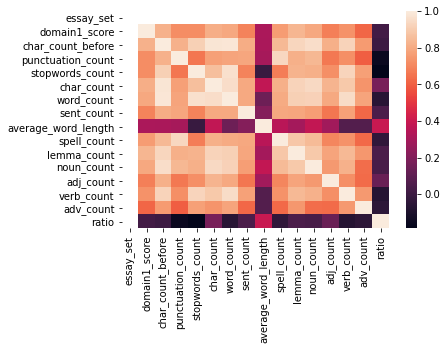

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
corr = features_set1.corr()
print(corr)
#plt.figure(figsize=(16,16))
sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns)